In [1]:
import numpy as np
import pandas as pd
import sys, os, time
main_folder = './../'
if main_folder not in sys.path:
    sys.path.append(main_folder)
from evolution import DifferentialEvolution
from glob       import glob
from tqdm       import tqdm

import dirs
from utils      import get_solution, ProgressBar, write_log
import matplotlib.pyplot as plt 

progbar = ProgressBar(elapsed_time=True)

### Parameters

In [2]:
# Competition Parameters
funcId      = 1
dim         = 10
numRuns     = 2
targetError = 1e-8

# Algorithm Parameters
pop_size = 300
percMaxEvals = 1
maxEvals = 'auto'
maxGenerations = None
fitness_clusters = None
crossover = 'binonial'
mutation = 'best'
n_diff = 1
lambda_mutation = .5
opposition = False
input_data_filepath = './../input_data'
active = False

In [3]:
# Parameters
algorithm = "de"
mutation = "best"
n_diff = 1
crossover = "bin"
funcId = 9
dim = 10
numRuns = 51
pop_size = 300
percMaxEvals = 0.01
lambda_mutation = 0.5
opposition = False
fitness_clusters = None
input_data_filepath = "./input_data"
active = True


In [4]:
maxEvals = maxEvals if percMaxEvals is None else percMaxEvals*10000*dim
run_tag = '[' + '_'.join([str(funcId), 
                          str(dim), 
                          str(numRuns),
                          str(pop_size), 
                          str(percMaxEvals),                                                     
                          '{}'.format(lambda_mutation), 
                          str(opposition),
                          str(fitness_clusters)
                         ])  + ']'
run_tag

'[9_10_51_300_0.01_0.5_False_None]'

In [5]:
alg = DifferentialEvolution(dim=dim, func_id=funcId, pop_size=pop_size, crossover=crossover, 
        opposition=opposition, mutation=mutation, lambda_mutation=.5, fitness_clusters=fitness_clusters)

output_filepath = os.path.join(dirs.results, str(alg))
if not os.path.exists(output_filepath):
    os.makedirs(output_filepath)
output_filepath = output_filepath + '/' + run_tag

print ('Writing log at ', output_filepath + 'log.tsv')
write_log(filepath=output_filepath + 'log.tsv', 
          mode="w+", 
          text='[{}]\trun\telapsedTime\tsuccessRate\n'.format(time.strftime("%Y-%m-%d %H:%M:%S", time.gmtime())))  

Writing log at 

./results/DE/best/1/bin/[9_10_51_300_0.01_0.5_False_None]log.tsv

In [6]:
hist = pd.DataFrame()
arr_runs = range(numRuns)
solution = get_solution(funcId, dim, input_data_filepath=input_data_filepath)
successRate = 0
for idx_run in arr_runs:
    progbar.update_progress(idx_run/float(len(arr_runs)))
    
    # Differential Evolution
    alg = DifferentialEvolution(dim=dim, func_id=funcId, pop_size=pop_size, crossover=crossover, 
        opposition=opposition, mutation=mutation, lambda_mutation=.5, fitness_clusters=fitness_clusters)
    
    errorHist, fitnessHist = alg.optimize(target=solution, max_f_evals=maxEvals, target_error=targetError, verbose=True)        
    bestError = errorHist.iloc[-1,:].min()
    errorHist["run"] = np.ones(errorHist.shape[0], dtype=int)*idx_run
    hist = pd.concat([hist, errorHist], ignore_index=False)    
    if bestError <= targetError:
        print ("Target error achieved with error {}".format(bestError))
        successRate += 1
    
    write_log(filepath=output_filepath + 'log.tsv', 
              text='[{}]\t{}/{}\t{}\t{}\n'.format(time.strftime("%Y-%m-%d %H:%M:%S", time.gmtime()), 
                                              idx_run+1,
                                              len(arr_runs),
                                              progbar.get_elapsed_time(),
                                              successRate)
             )
    
hist.index.name = 'generation'
hist.to_csv(output_filepath + 'hist.tsv', sep='\t')
progbar.update_progress(1)

[0:00:00][----------] 0.00% 


#Generations:	2

#FitnessEvals:	1200

Mean Fitness:	1085.9796

Best Fitness:	987.2197
Solution:	900.0000
Diff:		87.2197

[0:00:05][----------] 1.96% 


#Generations:	2

#FitnessEvals:	1200

Mean Fitness:	1079.1600

Best Fitness:	977.6633
Solution:	900.0000
Diff:		77.6633

[0:00:09][----------] 3.92% 


#Generations:	2

#FitnessEvals:	1200

Mean Fitness:	1086.1261

Best Fitness:	996.0758
Solution:	900.0000
Diff:		96.0758

[0:00:14][#---------] 5.88% 


#Generations:	2

#FitnessEvals:	1200

Mean Fitness:	1081.1388

Best Fitness:	994.8840
Solution:	900.0000
Diff:		94.8840

[0:00:18][#---------] 7.84% 


#Generations:	2

#FitnessEvals:	1200

Mean Fitness:	1073.6096

Best Fitness:	982.2190
Solution:	900.0000
Diff:		82.2190

[0:00:22][#---------] 9.80% 


#Generations:	2

#FitnessEvals:	1200

Mean Fitness:	1084.4738

Best Fitness:	988.3844
Solution:	900.0000
Diff:		88.3844

[0:00:26][#---------] 11.76% 


#Generations:	2

#FitnessEvals:	1200

Mean Fitness:	1094.2098

Best Fitness:	989.0764
Solution:	900.0000
Diff:		89.0764

[0:00:30][#---------] 13.73% 


#Generations:	2

#FitnessEvals:	1200

Mean Fitness:	1074.2362

Best Fitness:	998.7505
Solution:	900.0000
Diff:		98.7505

[0:00:34][##--------] 15.69% 


#Generations:	2

#FitnessEvals:	1200

Mean Fitness:	1080.2807

Best Fitness:	992.0140
Solution:	900.0000
Diff:		92.0140

[0:00:38][##--------] 17.65% 


#Generations:	2

#FitnessEvals:	1200

Mean Fitness:	1089.0796

Best Fitness:	991.4167
Solution:	900.0000
Diff:		91.4167

[0:00:42][##--------] 19.61% 


#Generations:	2

#FitnessEvals:	1200

Mean Fitness:	1079.7255

Best Fitness:	996.0661
Solution:	900.0000
Diff:		96.0661

[0:00:46][##--------] 21.57% 


#Generations:	2

#FitnessEvals:	1200

Mean Fitness:	1078.1936

Best Fitness:	993.9225
Solution:	900.0000
Diff:		93.9225

[0:00:50][##--------] 23.53% 


#Generations:	2

#FitnessEvals:	1200

Mean Fitness:	1082.2977

Best Fitness:	991.6287
Solution:	900.0000
Diff:		91.6287

[0:00:54][###-------] 25.49% 


#Generations:	2

#FitnessEvals:	1200

Mean Fitness:	1083.4314

Best Fitness:	995.5686
Solution:	900.0000
Diff:		95.5686

[0:00:58][###-------] 27.45% 


#Generations:	2

#FitnessEvals:	1200

Mean Fitness:	1076.8784

Best Fitness:	993.8799
Solution:	900.0000
Diff:		93.8799

[0:01:02][###-------] 29.41% 


#Generations:	2

#FitnessEvals:	1200

Mean Fitness:	1083.8607

Best Fitness:	992.3631
Solution:	900.0000
Diff:		92.3631

[0:01:07][###-------] 31.37% 


#Generations:	2

#FitnessEvals:	1200

Mean Fitness:	1081.4665

Best Fitness:	990.6603
Solution:	900.0000
Diff:		90.6603

[0:01:11][###-------] 33.33% 


#Generations:	2

#FitnessEvals:	1200

Mean Fitness:	1084.4151

Best Fitness:	992.2095
Solution:	900.0000
Diff:		92.2095

[0:01:15][####------] 35.29% 


#Generations:	2

#FitnessEvals:	1200

Mean Fitness:	1085.8540

Best Fitness:	980.1796
Solution:	900.0000
Diff:		80.1796

[0:01:21][####------] 37.25% 


#Generations:	2

#FitnessEvals:	1200

Mean Fitness:	1085.9977

Best Fitness:	997.4530
Solution:	900.0000
Diff:		97.4530

[0:01:28][####------] 39.22% 


#Generations:	2

#FitnessEvals:	1200

Mean Fitness:	1080.5717

Best Fitness:	978.5950
Solution:	900.0000
Diff:		78.5950

[0:01:30][####------] 41.18% 


#Generations:	2

#FitnessEvals:	1200

Mean Fitness:	1084.3548

Best Fitness:	993.5785
Solution:	900.0000
Diff:		93.5785

[0:01:33][####------] 43.14% 


#Generations:	2

#FitnessEvals:	1200

Mean Fitness:	1082.1785

Best Fitness:	982.7496
Solution:	900.0000
Diff:		82.7496

[0:01:39][#####-----] 45.10% 


#Generations:	2

#FitnessEvals:	1200

Mean Fitness:	1081.4854

Best Fitness:	984.8234
Solution:	900.0000
Diff:		84.8234

[0:01:45][#####-----] 47.06% 


#Generations:	2

#FitnessEvals:	1200

Mean Fitness:	1084.3027

Best Fitness:	997.6409
Solution:	900.0000
Diff:		97.6409

[0:01:50][#####-----] 49.02% 


#Generations:	2

#FitnessEvals:	1200

Mean Fitness:	1081.9710

Best Fitness:	964.0219
Solution:	900.0000
Diff:		64.0219

[0:01:53][#####-----] 50.98% 


#Generations:	2

#FitnessEvals:	1200

Mean Fitness:	1081.9636

Best Fitness:	997.7058
Solution:	900.0000
Diff:		97.7058

[0:01:57][#####-----] 52.94% 


#Generations:	2

#FitnessEvals:	1200

Mean Fitness:	1079.3706

Best Fitness:	986.7319
Solution:	900.0000
Diff:		86.7319

[0:02:04][#####-----] 54.90% 


#Generations:	2

#FitnessEvals:	1200

Mean Fitness:	1085.6326

Best Fitness:	1004.8641
Solution:	900.0000
Diff:		104.8641

[0:02:11][######----] 56.86% 


#Generations:	2

#FitnessEvals:	1200

Mean Fitness:	1084.5291

Best Fitness:	998.6687
Solution:	900.0000
Diff:		98.6687

[0:02:16][######----] 58.82% 


#Generations:	2

#FitnessEvals:	1200

Mean Fitness:	1076.3376

Best Fitness:	984.6823
Solution:	900.0000
Diff:		84.6823

[0:02:20][######----] 60.78% 


#Generations:	2

#FitnessEvals:	1200

Mean Fitness:	1076.6685

Best Fitness:	990.3999
Solution:	900.0000
Diff:		90.3999

[0:02:25][######----] 62.75% 


#Generations:	2

#FitnessEvals:	1200

Mean Fitness:	1086.1251

Best Fitness:	974.3723
Solution:	900.0000
Diff:		74.3723

[0:02:28][######----] 64.71% 


#Generations:	2

#FitnessEvals:	1200

Mean Fitness:	1083.4112

Best Fitness:	987.8905
Solution:	900.0000
Diff:		87.8905

[0:02:32][#######---] 66.67% 


#Generations:	2

#FitnessEvals:	1200

Mean Fitness:	1082.5840

Best Fitness:	962.5941
Solution:	900.0000
Diff:		62.5941

[0:02:37][#######---] 68.63% 


#Generations:	2

#FitnessEvals:	1200

Mean Fitness:	1073.9688

Best Fitness:	963.2057
Solution:	900.0000
Diff:		63.2057

[0:02:41][#######---] 70.59% 


#Generations:	2

#FitnessEvals:	1200

Mean Fitness:	1083.6183

Best Fitness:	986.0216
Solution:	900.0000
Diff:		86.0216

[0:02:45][#######---] 72.55% 


#Generations:	2

#FitnessEvals:	1200

Mean Fitness:	1081.6984

Best Fitness:	968.9344
Solution:	900.0000
Diff:		68.9344

[0:02:47][#######---] 74.51% 


#Generations:	2

#FitnessEvals:	1200

Mean Fitness:	1072.1056

Best Fitness:	982.2112
Solution:	900.0000
Diff:		82.2112

[0:02:54][########--] 76.47% 


#Generations:	2

#FitnessEvals:	1200

Mean Fitness:	1081.1699

Best Fitness:	1000.4643
Solution:	900.0000
Diff:		100.4643

[0:02:57][########--] 78.43% 


#Generations:	2

#FitnessEvals:	1200

Mean Fitness:	1079.9321

Best Fitness:	989.0736
Solution:	900.0000
Diff:		89.0736

[0:03:02][########--] 80.39% 


#Generations:	2

#FitnessEvals:	1200

Mean Fitness:	1079.5627

Best Fitness:	989.5140
Solution:	900.0000
Diff:		89.5140

[0:03:06][########--] 82.35% 


#Generations:	2

#FitnessEvals:	1200

Mean Fitness:	1088.8155

Best Fitness:	1003.7774
Solution:	900.0000
Diff:		103.7774

[0:03:12][########--] 84.31% 


#Generations:	2

#FitnessEvals:	1200

Mean Fitness:	1080.3740

Best Fitness:	981.4177
Solution:	900.0000
Diff:		81.4177

[0:03:16][#########-] 86.27% 


#Generations:	2

#FitnessEvals:	1200

Mean Fitness:	1078.3115

Best Fitness:	985.1059
Solution:	900.0000
Diff:		85.1059

[0:03:21][#########-] 88.24% 


#Generations:	2

#FitnessEvals:	1200

Mean Fitness:	1078.7904

Best Fitness:	994.8776
Solution:	900.0000
Diff:		94.8776

[0:03:24][#########-] 90.20% 


#Generations:	2

#FitnessEvals:	1200

Mean Fitness:	1078.4748

Best Fitness:	985.4299
Solution:	900.0000
Diff:		85.4299

[0:03:26][#########-] 92.16% 


#Generations:	2

#FitnessEvals:	1200

Mean Fitness:	1082.4547

Best Fitness:	970.1632
Solution:	900.0000
Diff:		70.1632

[0:03:32][#########-] 94.12% 


#Generations:	2

#FitnessEvals:	1200

Mean Fitness:	1080.8264

Best Fitness:	978.1148
Solution:	900.0000
Diff:		78.1148

[0:03:37][##########] 96.08% 


#Generations:	2

#FitnessEvals:	1200

Mean Fitness:	1087.9503

Best Fitness:	1011.2013
Solution:	900.0000
Diff:		111.2013

[0:03:43][##########] 98.04% 


#Generations:	2

#FitnessEvals:	1200

Mean Fitness:	1084.9889

Best Fitness:	977.2779
Solution:	900.0000
Diff:		77.2779

[0:03:46][##########] 100.00% Done...


In [7]:
print ("Elapsed Time: ", progbar.get_elapsed_time())

Elapsed Time: 

0:03:46

In [8]:
errorHist.tail()

,0,1,2,3,4,5,6,7,8,9,...,291,292,293,294,295,296,297,298,299,run
generation,,,,,,,,,,,,,,,,,,,,,
0,127.131903,136.444213,137.11496,137.958093,150.906535,154.495749,157.72802,158.362032,159.151432,159.314431,...,160.289074,221.953658,294.448737,240.932427,216.904459,240.054968,278.96361,131.04949,185.865044,50
1,127.131903,136.444213,137.11496,128.518426,150.906535,154.495749,157.72802,158.362032,159.151432,159.314431,...,160.289074,165.998767,231.866276,236.281016,216.904459,188.298102,156.27657,131.04949,139.378887,50


In [9]:
arr_error = list()
arr_best_error = list()
for run in hist['run'].unique():
    df_run = hist[hist['run'] == run].drop(['run'], axis=1) 
    bestError = df_run.iloc[-1,:].min()    
    arr_best_error.append(bestError)    
    print ('Best error for run {}: {}'.format(run, bestError))
    arr_error.append(np.array(df_run.min(axis=1)))    
arr_error = np.array(arr_error)
# arr_error

Best error for run 0: 87.21970911086805

Best error for run 1: 77.66334126181573

Best error for run 2: 96.07578096853581

Best error for run 3: 94.88400847359185

Best error for run 4: 82.21904564534952

Best error for run 5: 88.38441755435531

Best error for run 6: 89.07638226517395

Best error for run 7: 98.75051788025257

Best error for run 8: 92.01403068778927

Best error for run 9: 91.41670768751362

Best error for run 10: 96.06613755419471

Best error for run 11: 93.92252816190376

Best error for run 12: 91.62873977149025

Best error for run 13: 95.56856228323511

Best error for run 14: 93.87991064751293

Best error for run 15: 92.36312238526375

Best error for run 16: 90.66031414442705

Best error for run 17: 92.20948136215225

Best error for run 18: 80.17960702839616

Best error for run 19: 97.45302707445182

Best error for run 20: 78.5950346089503

Best error for run 21: 93.5785046850765

Best error for run 22: 82.74956739593927

Best error for run 23: 84.82341348688863

Best error for run 24: 97.64090765012611

Best error for run 25: 64.02192850154404

Best error for run 26: 97.70577725881321

Best error for run 27: 86.73194858009265

Best error for run 28: 104.86409972180002

Best error for run 29: 98.66866941803346

Best error for run 30: 84.68233375826753

Best error for run 31: 90.3998757414679

Best error for run 32: 74.37233959542243

Best error for run 33: 87.8904952226062

Best error for run 34: 62.59407954993412

Best error for run 35: 63.20570691719115

Best error for run 36: 86.0215707044182

Best error for run 37: 68.93440832143187

Best error for run 38: 82.21117106907661

Best error for run 39: 100.46429960644355

Best error for run 40: 89.07356683570333

Best error for run 41: 89.51403831053153

Best error for run 42: 103.77736311198169

Best error for run 43: 81.41770401967415

Best error for run 44: 85.10586300619548

Best error for run 45: 94.87760058328581

Best error for run 46: 85.42992296535112

Best error for run 47: 70.16319485514441

Best error for run 48: 78.11476082032323

Best error for run 49: 111.20125065321201

Best error for run 50: 77.27793793173612

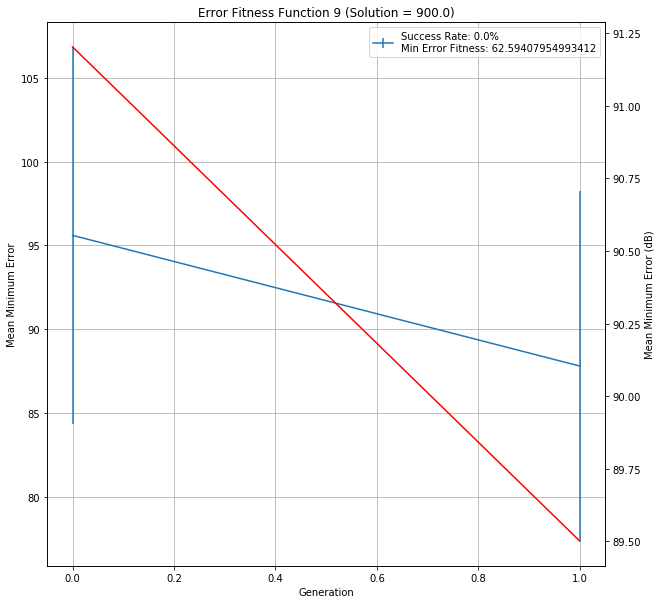

In [10]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(10,10))
label = 'Success Rate: {}%\nMin Error Fitness: {}'.format(100*(successRate/float(numRuns)), arr_error.min())
ax.errorbar(np.arange(alg.generations), arr_error.mean(axis=0), yerr=arr_error.std(axis=0), label=label)
ax2 = ax.twinx()
ax2.plot(np.arange(alg.generations), 20*np.log(arr_error.mean(axis=0)), label='Mean Min Error (dB)', color='red')
ax2.set_ylabel('Mean Minimum Error (dB)')

ax.grid(True)
ax.set_ylabel('Mean Minimum Error')
ax.legend()
ax.set_xlabel('Generation')
ax.set_title('Error Fitness Function {} (Solution = {})'.format(funcId, solution))
plt.savefig(output_filepath + 'mean_error_evolution.jpeg', bbox_inches = 'tight')

In [11]:
df_sumup = pd.DataFrame(columns=['algorithm', '#Fc', 'D', 'percFES'] + ['run_' + str(i) for i in np.arange(1,numRuns+1,1)] + ['mean', 'elapsed_time', 'evals'])
df_sumup.loc[df_sumup.shape[0]] = [str(alg), funcId, dim, percMaxEvals] + arr_best_error + [np.mean(arr_best_error), progbar.get_elapsed_time(), alg.fitnessEvals]
print ('Saving df_sumup to ', output_filepath + 'df_sumup.tsv')
df_sumup.to_csv(output_filepath + 'df_sumup.tsv', sep='\t')
df_sumup

Saving df_sumup to 

./results/DE/best/1/bin/[9_10_51_300_0.01_0.5_False_None]df_sumup.tsv

,algorithm,#Fc,D,percFES,run_1,run_2,run_3,run_4,run_5,run_6,...,run_45,run_46,run_47,run_48,run_49,run_50,run_51,mean,elapsed_time,evals
0,DE/best/1/bin,9,10,0.01,87.219709,77.663341,96.075781,94.884008,82.219046,88.384418,...,85.105863,94.877601,85.429923,70.163195,78.114761,111.201251,77.277938,87.798916,0:03:46,1200
